In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, copysign, log10

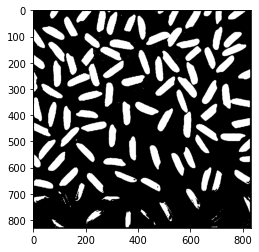

In [4]:
rice = cv2.imread('rice.png')

blue, green, red = cv2.split(rice)

ret, bw = cv2.threshold(red, 150, 255, cv2.THRESH_BINARY)
plt.imshow(bw, cmap='gray')

In [5]:
def cambio_escala (image, factor):

    factor_times = factor
    height = int(image.shape[0] * factor_times)
    width  = int(image.shape[1] * factor_times)
    dim    = (width, height) 
    #cambio de escala 
    output = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)
    return output

Momento 0	 Original:[2.9086735]	 Modificada:[2.9086695]
Momento 1	 Original:[8.3709141]	 Modificada:[8.3707401]
Momento 2	 Original:[11.2627279]	 Modificada:[11.2629076]
Momento 3	 Original:[11.0437875]	 Modificada:[11.0436985]
Momento 4	 Original:[22.2479303]	 Modificada:[22.2478558]
Momento 5	 Original:[-15.2312626]	 Modificada:[-15.2310722]
Momento 6	 Original:[22.5370732]	 Modificada:[22.5371461]


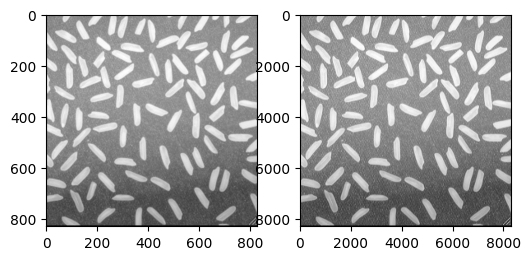

In [6]:
rice_bw = cv2.imread('rice.png',0)

#cambiamos la escala de la imagen
scaled_img = cambio_escala (rice_bw, 10)

#extracción de los siete momentos de HU
huMoments = cv2.HuMoments(cv2.moments(rice_bw))
huMoments_Scaled = cv2.HuMoments(cv2.moments(scaled_img))

for i in range(0,7):
    huMoments[i] = -1* copysign(1.0, huMoments[i]) * log10(np.abs(huMoments[i]))
    huMoments_Scaled[i] = -1* copysign(1.0, huMoments_Scaled[i]) * log10(np.abs(huMoments_Scaled[i]))
    print(f'Momento {i}\t Original:{huMoments[i].round(7)}\t Modificada:{ huMoments_Scaled[i].round(7)}')


plt.figure(dpi=100)
plt.subplot(121)
plt.imshow(rice_bw, cmap='gray')

plt.subplot(122)
plt.imshow(scaled_img, cmap='gray')
plt.show()

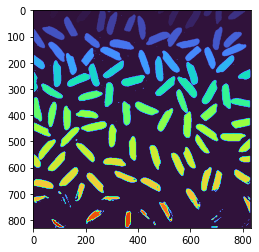

In [7]:
from skimage.measure import label, regionprops, perimeter
bw_label = label(bw[:,:])

plt.imshow(bw_label, cmap = "turbo")
plt.show()

#se separa por regiones
sts = regionprops(label_image = bw_label)

In [8]:
def gradiente_perimetro(I, J, im):
    
    n = len(I)
    out = 0
    for i in range(0, n):
        out = out + gradiente(I[i],J[i],im)

    return float(out/n)


def gradiente(i,j,L):
    # funcion que calcula el gradiente
    # en la posicion posL de la imagen L
    Lx= -0.5*L[i-1,j]+0.5*L[i+1,j]
    Ly= -0.5*L[i,j-1]+0.5*L[i,j+1]
    out= sqrt(Lx**2+Ly**2)
    return out

In [46]:
for region in sts:
    if all(i > j for i, j in zip(region.image.shape,(2,2))):
        region_rice = bw[region.bbox[0]:region.bbox[2],region.bbox[1]:region.bbox[3]]
        
        #plt.imshow(region_rice, cmap="gray")
        #plt.show()
        #buscamos las coordenadas de los contornos 
        contours, hierarchy = cv2.findContours(region_rice, 
                                                cv2.RETR_EXTERNAL, 
                                                cv2.CHAIN_APPROX_NONE)

        contornos = np.vstack(contours[0])

        #extraemos las coordenadas x,y 
        x , y = zip(*contornos)
        x = np.array(x).reshape(-1,1)
        y = np.array(y).reshape(-1,1)

        #calculamos la derivada del perimetro
        dprom = gradiente_perimetro(x,y, bw)
        print("shape: ", region.image.shape)
        print(f'Derivada promedio: {dprom:2.2f}')

shape:  (29, 33)
Derivada promedio: 0.00
shape:  (45, 57)
Derivada promedio: 0.00
shape:  (12, 23)
Derivada promedio: 0.00
shape:  (58, 41)
Derivada promedio: 0.00
shape:  (68, 60)
Derivada promedio: 1.42
shape:  (21, 32)
Derivada promedio: 0.00
shape:  (51, 24)
Derivada promedio: 0.00
shape:  (33, 66)
Derivada promedio: 0.00
shape:  (80, 35)
Derivada promedio: 4.77
shape:  (5, 12)
Derivada promedio: 0.00
shape:  (89, 41)
Derivada promedio: 6.42
shape:  (65, 44)
Derivada promedio: 7.31
shape:  (3, 3)
Derivada promedio: 0.00
shape:  (91, 31)
Derivada promedio: 8.38
shape:  (75, 52)
Derivada promedio: 0.00
shape:  (53, 85)
Derivada promedio: 3.29
shape:  (88, 37)
Derivada promedio: 5.17
shape:  (73, 136)
Derivada promedio: 0.00
shape:  (73, 43)
Derivada promedio: 0.00
shape:  (60, 69)
Derivada promedio: 5.80
shape:  (57, 58)
Derivada promedio: 0.00
shape:  (37, 88)
Derivada promedio: 24.34
shape:  (39, 92)
Derivada promedio: 0.00
shape:  (76, 63)
Derivada promedio: 24.29
shape:  (48, 92)